# Лабораторная работа по нейроинформатике №7

Выполнил: _Коростелев Д.В._ Группа: _М8О-408Б-18_ Вариант: _11_


### Вариант

In [1]:
#прямоугольник
from math import tan
d1=0.5
d2=0.3
a=0
x0=-0.5
y0=0.1

### Задание 1
Использовать автоассоциативную сеть с узким горлом для отображения набора данных,
выделяя первую главную компоненту данных.

In [2]:
import numpy as np
def gen_points(count):
    count_on_side = int(count/4)
    x = list()
    y = list()
    for k in np.linspace(-1, 1, count_on_side):
        x.append(-d1/2)
        y.append(k * d2/2)
    for k in np.linspace(-1, 1, count_on_side):
        x.append(d1/2)
        y.append(k * d2/2)
    for k in np.linspace(-1, 1, count_on_side):
        x.append(d1 * k/2)
        y.append(d2/2)
    for k in np.linspace(-1, 1, count_on_side):
        x.append(d1*k/2)
        y.append(-d2/2)
    return np.array(x)+x0, np.array(y)+y0

Сгенерируем точки на квадрате

In [3]:
x, y = gen_points(100)

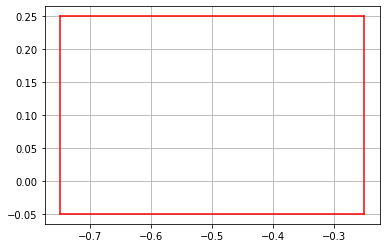

In [4]:
from matplotlib import pyplot as plt
plt.plot(x[0:25], y[0:25],c='#FF0000')
plt.plot(x[25:50], y[25:50],c='#FF0000')
plt.plot(x[50:75], y[50:75],c='#FF0000')
plt.plot(x[75:], y[75:],c='#FF0000')
plt.grid(True)

Задаем ассоциативную нейронную сеть со скрытым слоем 1. Для обучения используем алгоритм метод Левенберга-Марквардта

In [5]:
#!pip install pyrenn
import pyrenn

nn = pyrenn.CreateNN([2, 1, 2])
nn = pyrenn.train_LM(np.array([x,y]), np.array([x,y]), nn, E_stop=1e-5, k_max=200)

Maximum number of iterations reached


In [6]:
pred = pyrenn.NNOut(np.array([x,y]), nn)

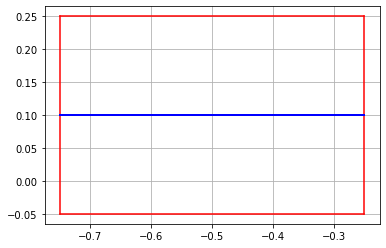

In [7]:
plt.plot(x[0:25], y[0:25],c='#FF0000')
plt.plot(x[25:50], y[25:50],c='#FF0000')
plt.plot(x[50:75], y[50:75],c='#FF0000')
plt.plot(x[75:], y[75:],c='#FF0000')
plt.plot(pred[0], pred[1], 'blue', label="Prediction")
plt.grid(True)

### Задание №2

Использовать *автоассоциативную сеть с узким горлом* для аппроксимации кривой на плоскости, выделяя первую нелинейную главную компоненту данных.

In [8]:
import math
r=5
phi_int=(0.01, 11*math.pi/6)
def gen_function_points(phi): 
    return r*np.cos(phi), r*np.sin(phi)

In [9]:
x_phi, y_phi = gen_function_points(np.linspace(phi_int[0], phi_int[1], 100))

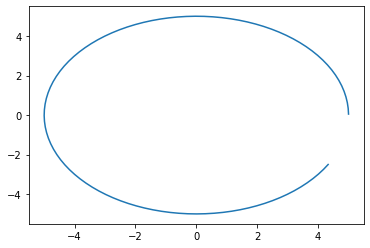

In [10]:
plt.plot(x_phi, y_phi)

In [11]:
nn2 = pyrenn.CreateNN([1, 10, 1, 10, 1])

In [12]:
nn2 = pyrenn.train_LM(x_phi, y_phi, nn2, E_stop=1e-5, k_max=2000)

Maximum number of iterations reached


In [13]:
pred2 = pyrenn.NNOut(x_phi, nn2)

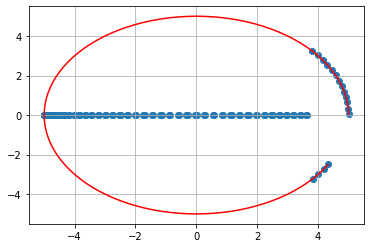

In [14]:
plt.plot(x_phi, y_phi, c='#FF0000')
plt.scatter(x_phi, pred2)
plt.grid(True)
plt.show()

### Задание №3
Задан обучающий набор. Точки набора лежат на пространственной
кривой. Построить автоассоциативную сеть с узким горлом, реализующую нелинейный метод главных компонент. С помощью сети выполнить аппроксимацию кривой, выделяя две старшие нелинейные главные компоненты.

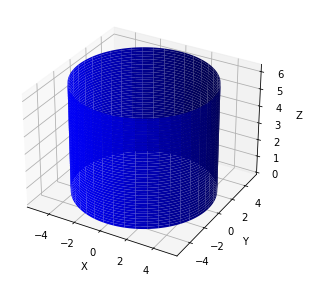

In [15]:
phi = np.linspace(0, 2 * np.pi, int(2 * np.pi / 0.025), endpoint=True) 
x3, y3 = gen_function_points(phi)
z3 = phi
fig = plt.figure(num=1, clear=True)
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(x3, y3, z3.reshape(-1, 1), color='blue')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
fig.tight_layout()

In [16]:
nn3 = pyrenn.CreateNN([2, 10, 2,  10, 1])
nn3 = pyrenn.train_LM(np.array([x3, z3]), y3, nn3, E_stop=1e-5, k_max=500)

Termination Error reached


In [17]:
pred3 = pyrenn.NNOut(np.array([x3, z3]), nn3)

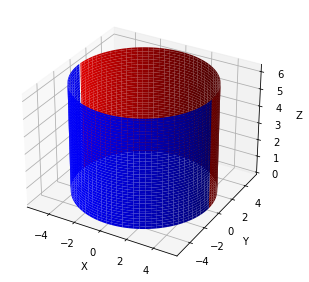

In [25]:
fig = plt.figure(num=1, clear=True)
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(x3[0:int(len(x3)/2)], y3[0:int(len(x3)/2)], z3.reshape(-1, 1), color='red')
ax.plot_surface(x3[int(len(x3)/2):], pred3[int(len(x3)/2):], z3.reshape(-1, 1), color='blue')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
fig.tight_layout()

### Вывод
В лабораторной работе требовалось построить авто ассоциативные сети и при помощи них найти главные компоненты различных фигур, различных размерностей. 

Сначала изучения теоретической части не понимал зачем нужны нейронные сети, которые принимают на вход некий образ и возвращают по сути такой же результат, но в ходе лабораторной работы удалось углубиться в автоэнкодеры и понять где и для чего они используются. Данные нейронные сети могут сами находить функциональные зависимости и преводить переданную на вход информацию из одного пространства в другое, выполнять различные преобразования.

Также узнал, каким образом работают нейронные сети, улучшающие качество старых или зашумленных фильмов и фото. В основе таких алгоритмов также лежат автоэнкодеры (их улучшенные версии), которые способны из поданного на вход образа выделить ключевые признаки и атрибуты и затем восстановить, либо немного изменить переданный на вход энкодеру образ.